# Diploma Project
## Yancharski Uladzislau
DA 1023C

##### Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.ticker as mticker
from scipy.stats import kurtosis
from scipy.stats import skew

##### Loading data from csv-file

In [2]:
data = pd.read_csv('USA Housing Dataset.csv')

__Date__: The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.

__Price__:The sale price of the property in USD. This is the target variable we aim
to predict.

__Bedrooms__:The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.

__Bathrooms__: The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.

__Sqft Living__: The size of the living area in square feet. Larger living areas are
typically associated with higher property values.

__Sqft Lot__:The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.

__Floors__: The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.

__Waterfront__: A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.

__View__: An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.

__Condition__: An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.

__Sqft Above__: The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.

__Sqft Basement__: The square footage of the basement. Basements may add value
depending on their usability.

__Yr Built__: The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.

__Yr Renovated__: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.

__Street__: The street address of the property. This feature can be used to analyze
location-specific price trends.

__City__: The city where the property is located. Different cities have distinct market
dynamics.

__Statezip__: The state and zip code of the property. This feature provides regional
context for the property.

__Country__: The country where the property is located. While this dataset focuses
on properties in USA, this feature is included for completeness.


##### Initial data viewing

In [3]:
def first_check(dataset):
 
    print()
    print('Первые 3 строки таблицы')
    display(dataset.head(3))
 
    print()
    print('Последние 3 строки таблицы')
    display(dataset.tail(3))
 
    print()
    print('Информация о таблице')   
    print(dataset.info())
 
    print()
    print('Характеристики чисел в таблице')  
    display(dataset.describe())
 
    print()
    print('Наименование колонок')  
    print(dataset.columns) 
    

first_check(data)


Первые 3 строки таблицы


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA



Последние 3 строки таблицы


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4137,2014-07-09 00:00:00,416904.166667,3.0,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,203400.000000,4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4139,2014-07-10 00:00:00,220600.000000,3.0,2.5,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA



Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000



Наименование колонок
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


How we can see column 'date' has incorrect Dtype. So we need chahge type to date

In [4]:
data['date'] = pd.to_datetime(data.date)

In [5]:
data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

Now all dtypes is correct

##### Check availability of NaN or Null values

In [6]:
data.isna().sum(), data.isnull().sum()

(date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 street           0
 city             0
 statezip         0
 country          0
 dtype: int64,
 date             0
 price            0
 bedrooms         0
 bathrooms        0
 sqft_living      0
 sqft_lot         0
 floors           0
 waterfront       0
 view             0
 condition        0
 sqft_above       0
 sqft_basement    0
 yr_built         0
 yr_renovated     0
 street           0
 city             0
 statezip         0
 country          0
 dtype: int64)

We don't have NaN or Null values

##### Let's check corr matrix

In [7]:
df = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

<Axes: >

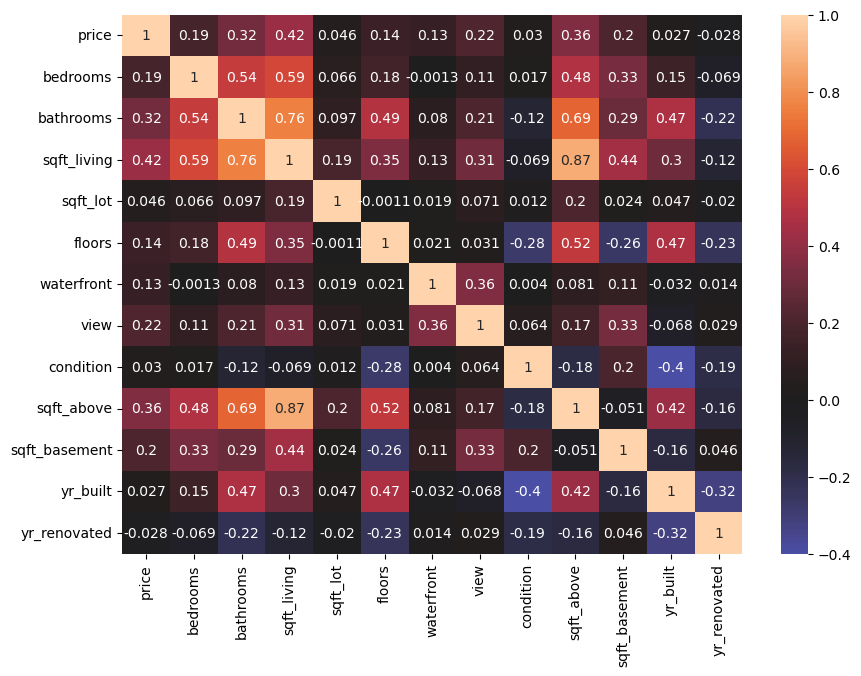

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), center=0, annot=True)

How we can see on the heatmap that, unfortantly, we don't have good correliation with price. So, try it in some city. We'll take city with the most sold houses.

In [9]:
#Determine city with most sold houses
top_city = data \
    .groupby(['country','city'], as_index=False) \
    .agg({'bathrooms':'count'}) \
    .rename(columns={'bathrooms':'qty'}) \
    .sort_values('qty', ascending=False) \
    .head(5) \
    .city \
    .values

top_city

array(['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Kent'], dtype=object)

In [10]:
data_in_top_city = data \
    .query('city == @top_city[0]')

data_in_top_city = data_in_top_city[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

<Axes: >

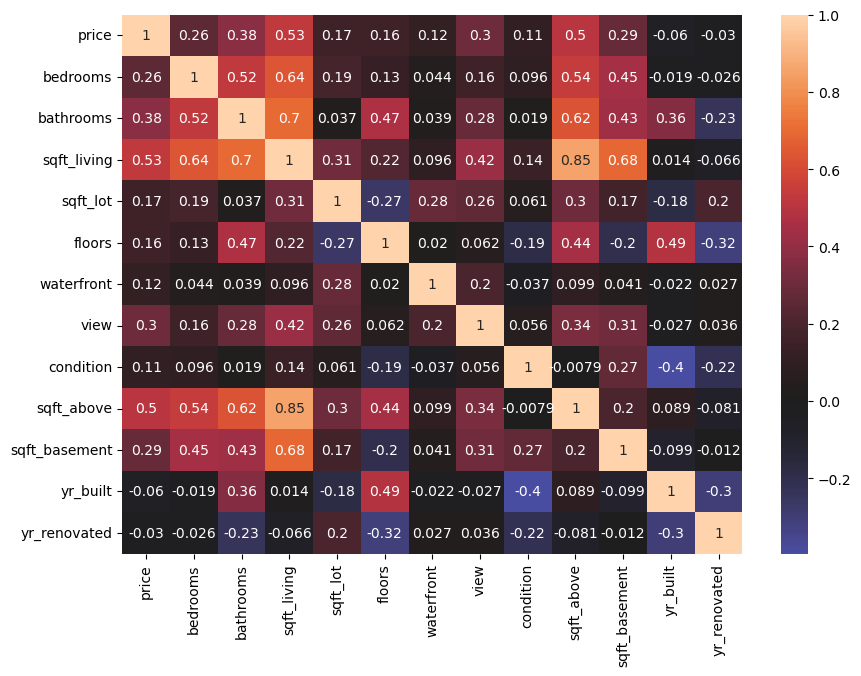

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data_in_top_city.corr(), center=0, annot=True)

##### Much better. We can see weak correlation price with sqft_living and sqft_above, but still not perfect. Try with second city

In [12]:
data_in_second_city = data \
    .query('city == @top_city[1]')

data_in_second_city = data_in_second_city[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

<Axes: >

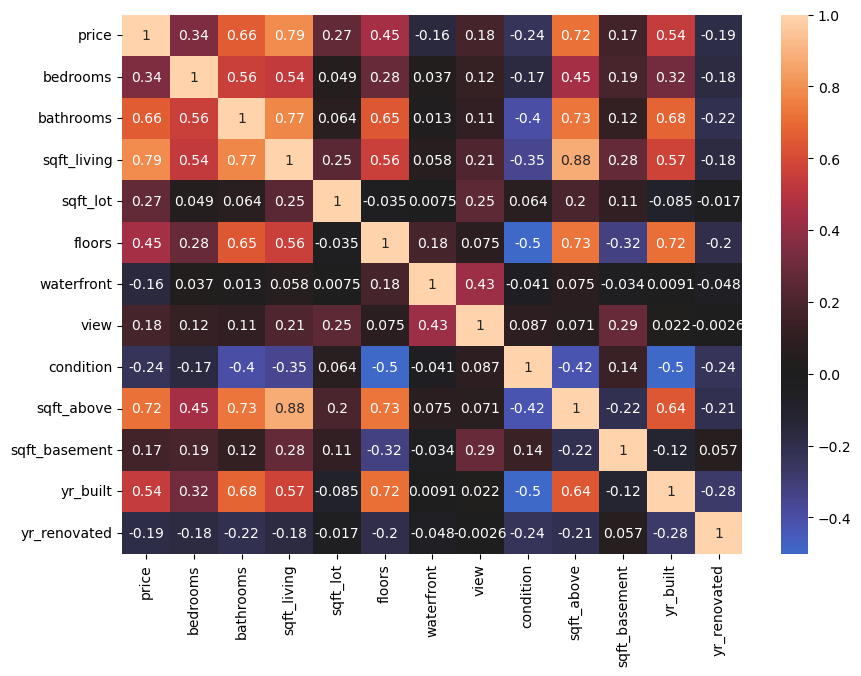

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data_in_second_city.corr(), center=0, annot=True)

Коэффициент корреляции 0.7925734071736114


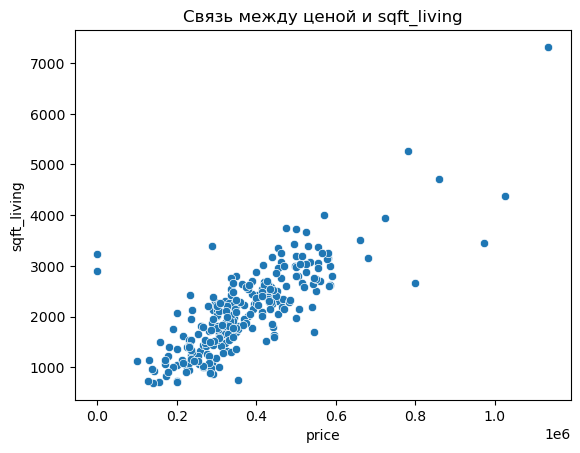

Коэффициент корреляции 0.7211610765907344


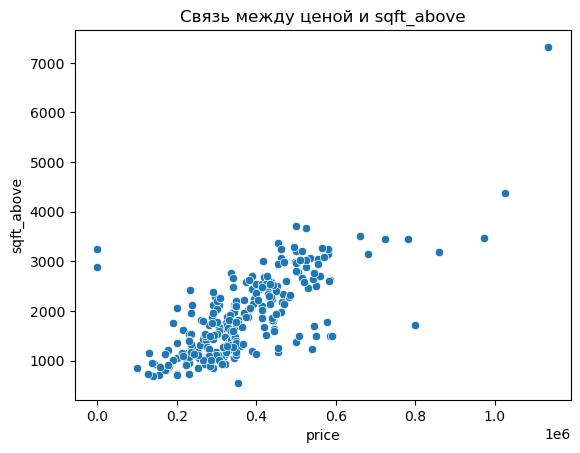

Коэффициент корреляции 0.5414557962058376


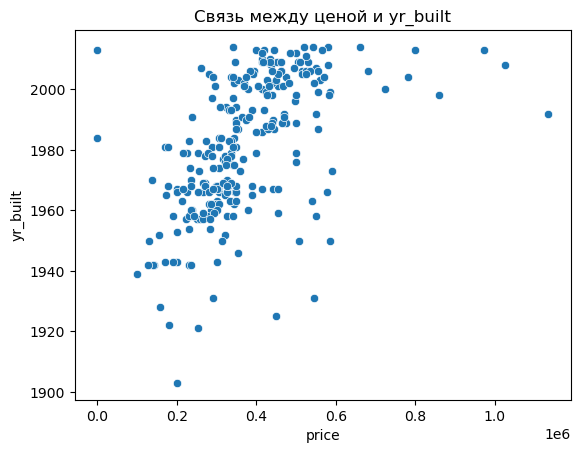

Коэффициент корреляции 0.6579357319673812


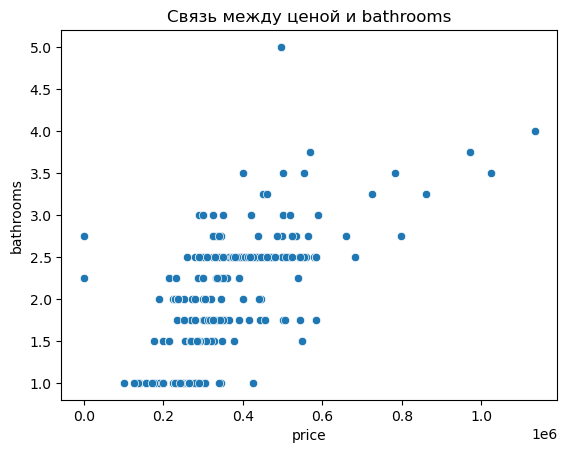

In [14]:
research_list = ['sqft_living', 'sqft_above', 'yr_built', 'bathrooms', 'price']

level = 0.5
for i in research_list[:-1]:
    curr_corr = data_in_second_city[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=data_in_second_city)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()

In [15]:
X = data_in_second_city[research_list[:4]]
Y = data_in_second_city.price

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           9.98e-56
Time:                        17:45:37   Log-Likelihood:                -3343.4
No. Observations:                 261   AIC:                             6697.
Df Residuals:                     256   BIC:                             6715.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.364e+06   6.96e+05     -1.961      

sqft_above and bathrooms have high p-value. So we are delete them

In [16]:
X = data_in_second_city[['sqft_living', 'yr_built']]
Y = data_in_second_city.price

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           5.61e-58
Time:                        17:45:38   Log-Likelihood:                -3343.7
No. Observations:                 261   AIC:                             6693.
Df Residuals:                     258   BIC:                             6704.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.633e+06   5.85e+05     -2.792      

##### Try to build linear regretion

In [17]:
data_in_second_city.shape

(261, 13)

In [18]:
df_train = data_in_second_city.head(200)
df_test = data_in_second_city.tail(61)

In [19]:
Y = df_train[['price']]
X = df_train[['sqft_living']]

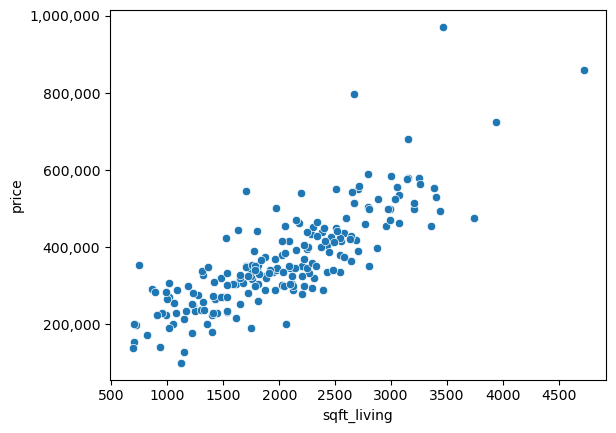

In [20]:
sns.scatterplot(data = df_train, y = 'price', x = 'sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [21]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [22]:
print(regressor.intercept_)
print(regressor.coef_)

[67856.93827403]
[[146.91047813]]


In [23]:
Y_test = df_test[['price']]
X_test = df_test[['sqft_living']]

In [24]:
Y_pred = regressor.predict(X_test)

In [25]:
print(f'Coefficient - {round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))/Y.mean()*100, 3)}')

Coefficient - price    36.121
dtype: float64


<Axes: xlabel='sqft_living', ylabel='price'>

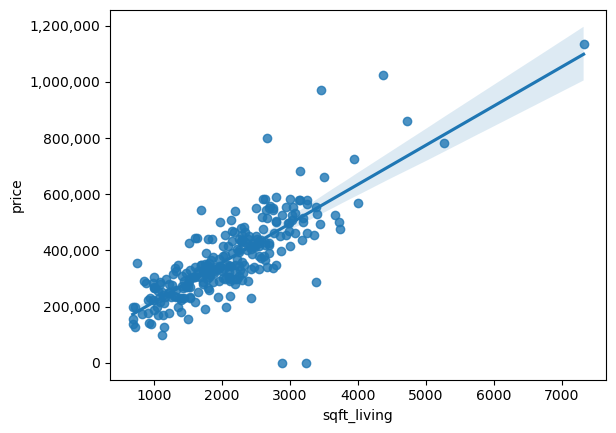

In [26]:
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.regplot(x = "sqft_living", y = 'price', data = data_in_second_city)

Despite strong correlation. We can't name it linear regression, because we have big relative error

##### Let's check the most expensive cities by median price of house

Important note: we check cities with more than 10 sold houses

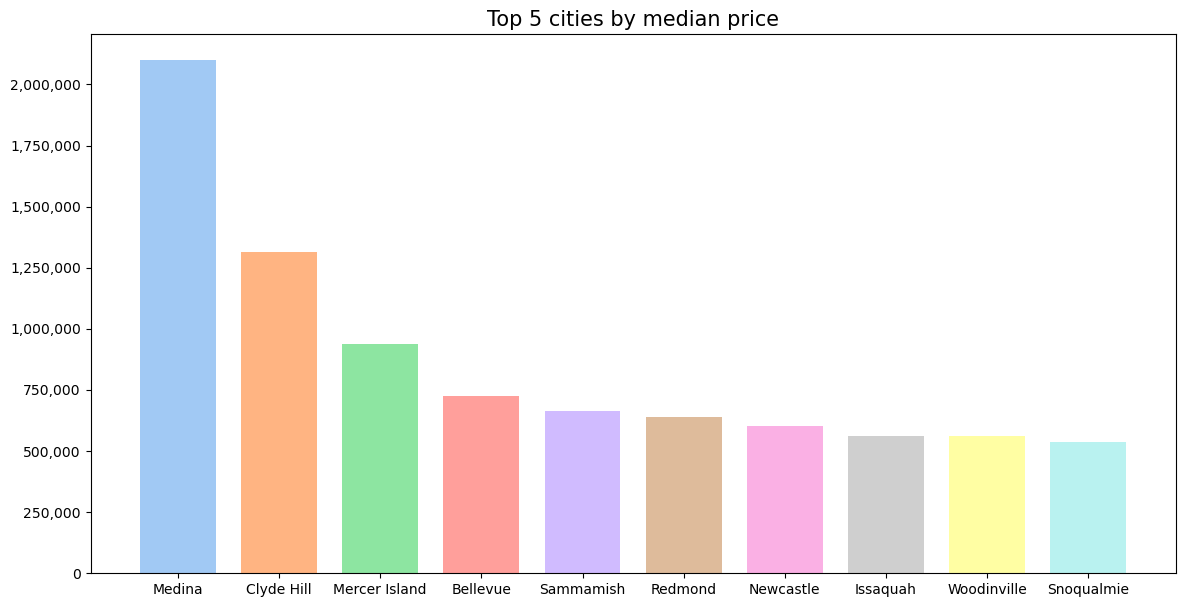

In [27]:
top_10_price = data \
    .groupby(['country','city'], as_index=False) \
    .agg({'price':'median', 'bathrooms':'count'}) \
    .rename(columns={'bathrooms':'qty'}) \
    .sort_values('price', ascending=False) \
    .query('qty >= 10') \
    .head(10)

colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(14,7))
plt.bar(x="city", height="price", width=0.75, data=top_10_price, color=colors)
plt.title('Top 5 cities by median price', size= 15)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

##### Distribution of the number of bedrooms

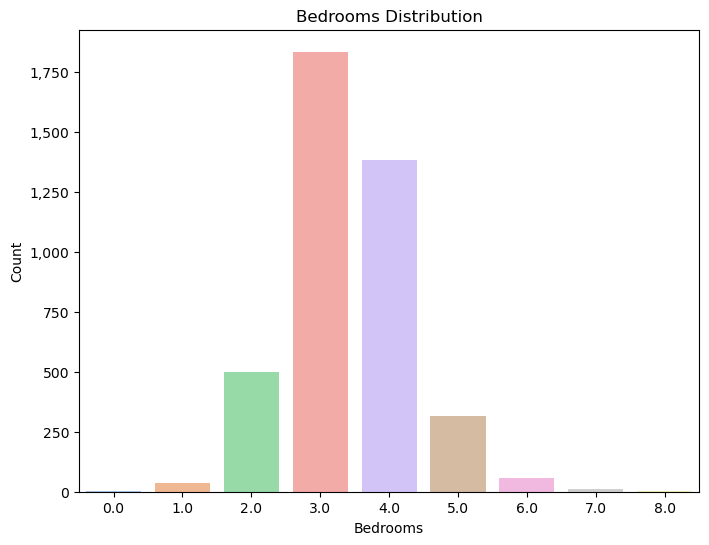

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='bedrooms', data=data, palette='pastel')
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [29]:
print("Эксцесс ", kurtosis(data['bedrooms']))
print("Ассиметрия ", skew(data['bedrooms']))

Эксцесс  0.9883578235673425
Ассиметрия  0.39413697501720807


##### Price distribution

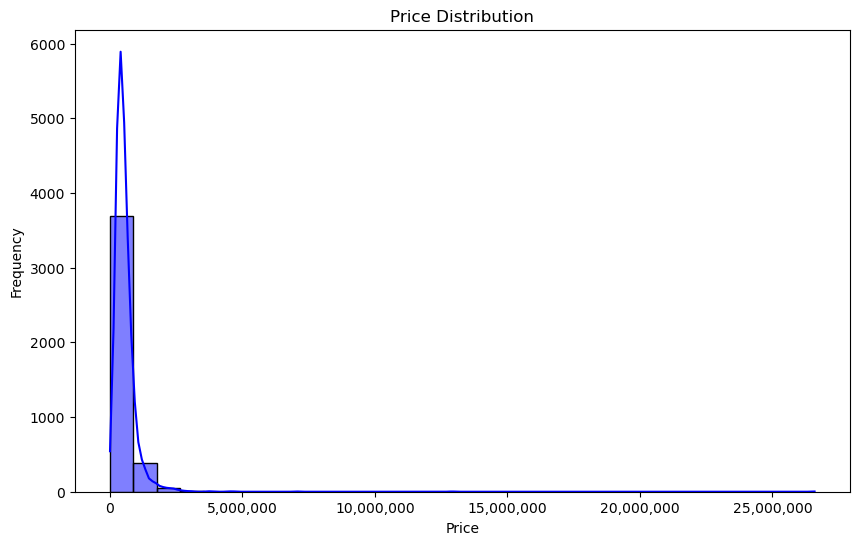

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [31]:
print("Эксцесс ", kurtosis(data['price']))
print("Ассиметрия ", skew(data['price']))

Эксцесс  1008.858036351128
Ассиметрия  24.754707342160682


##### Distribution of living area (sqft)

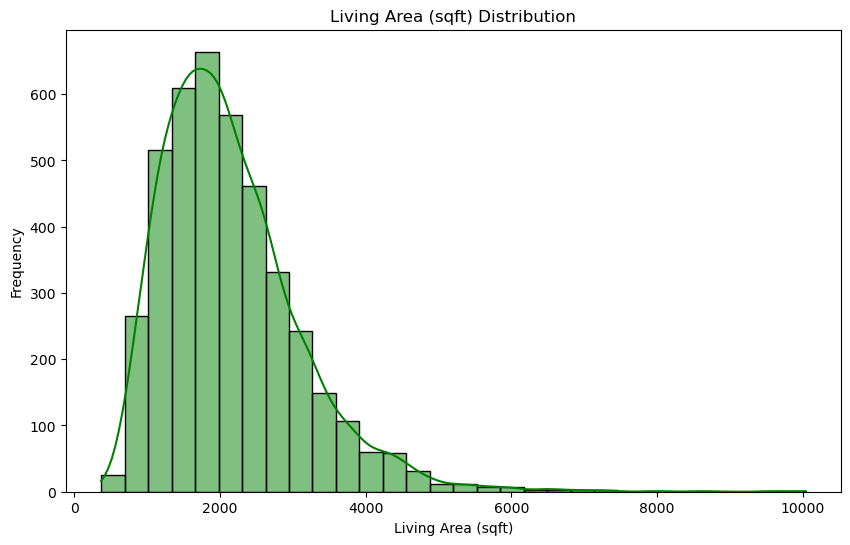

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sqft_living'], bins=30, kde=True, color='green')
plt.title('Living Area (sqft) Distribution')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
plt.show()

In [33]:
print("Эксцесс ", kurtosis(data['sqft_living']))
print("Ассиметрия ", skew(data['sqft_living']))

Эксцесс  4.630107201055502
Ассиметрия  1.4577184833896049


### Main conclusions:
1. The explicit dependence is observed only on __sqft_living__, but it is not a linear dependence
2. Most often there are 3/4 rooms in the house
3. The vast majority of houses belong to relatively cheap houses (up to 1 million)
4. The __sqft_living__ has an almost normal distribution. And most often it has an area of about 2,000 square feet